# Sanitation Techniques Classification

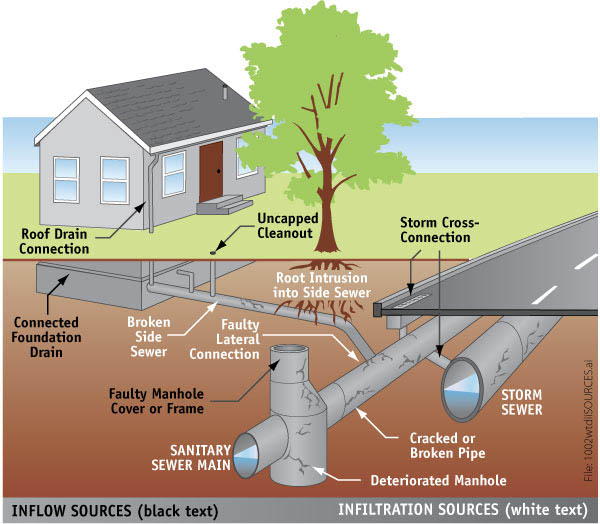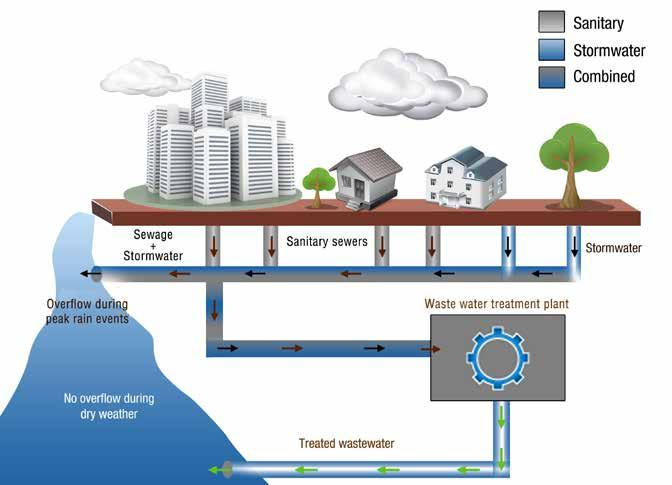

# 1. Introduction
Data Set Problems 🤔

👉This dataset contains information about Sanitation Techniques classification based on 12 parameters. Machine learning model is needed in order to give us the outcome of the sanitation type that might be suitable for the Decision maker.

**The machine learning models used in this project are:**

-- Linear Logistic Regression

-- Linear Support Vector Machine (SVM)

-- K Neighbours

-- Naive Bayes (Categorical & Gaussian)

-- Decision Tree

-- Random Forest

# 2. Importing Libraries :

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 3. Reading Data Set :

In [230]:
df_sanitation = pd.read_csv(f"{os.getcwd()}/Hackathon.csv")

👉 Remove the Id.

In [231]:
df_sanitation.drop(['CODE'],inplace=True,axis=1)

👉 Read the first 5 rows in the dataset.

In [232]:
df_sanitation.head()

,Population,Buildings number,area (in km2),Population Density,Building Density,Building Type,Planned,Slums,More than 4 floors,Polluting Industry,Economic Vulnerability,Drainage coverage and Typology,SANITATION TECH
0,801,70,100.0,8.01,0.70,Residential,0,0,0,1,critical,Pucca drain and uncovered,DEWATS
1,800,80,95.0,8.42,0.84,Residential,1,1,1,1,non critical,Katcha drain,SewerageS
2,802,75,140.0,5.73,0.54,Residential,1,0,1,0,critical,Covered pucca drain,FSM
3,803,77,190.0,4.23,0.41,Residential,0,0,0,1,critical,Pucca drain,SewerageS
4,200,25,123.0,1.63,0.20,Residential,1,1,0,1,critical,Unserved area,DEWATS


👉 Data type and checking null in dataset.

In [233]:
print(df_sanitation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Population                      287 non-null    int64  
 1   Buildings number                287 non-null    int64  
 2   area (in km2)                   287 non-null    float64
 3   Population Density              287 non-null    float64
 4   Building Density                287 non-null    float64
 5   Building Type                   287 non-null    object 
 6   Planned                         287 non-null    int64  
 7   Slums                           287 non-null    int64  
 8   More than 4 floors              287 non-null    int64  
 9   Polluting Industry              287 non-null    int64  
 10  Economic Vulnerability          287 non-null    object 
 11  Drainage coverage and Typology  287 non-null    object 
 12  SANITATION TECH                 287 

👉 From the results above, there are no missing/null value in this dataset

In [234]:
df_sanitation["SANITATION TECH"].value_counts()

SANITATION TECH
DEWATS             87
FSM                56
SewerageS          51
Sewerage/DEWATS    51
Sewerage/ FSM      42
Name: count, dtype: int64

In [235]:
df_sanitation["Drainage coverage and Typology"] = df_sanitation["Drainage coverage and Typology"].apply(lambda x: x.strip())

👉 It can be seen that from results above, DEWATS has more amount than other types

# Splitting the dataset
**👉 The dataset will be split into 70% training and 30% testing.**

In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [237]:
X = df_sanitation.drop(["SANITATION TECH"], axis=1)
y = df_sanitation["SANITATION TECH"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Using one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better classification

In [248]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,Population,Buildings number,area (in km2),Population Density,Building Density,Planned,Slums,More than 4 floors,Polluting Industry,Building Type_Commercial,...,Building Type_Residential,Economic Vulnerability_Critical,Economic Vulnerability_Insecured land tenure,Economic Vulnerability_critical,Economic Vulnerability_non critical,Drainage coverage and Typology_Covered pucca drain,Drainage coverage and Typology_Katcha drain,Drainage coverage and Typology_Pucca drain,Drainage coverage and Typology_Pucca drain and uncovered,Drainage coverage and Typology_Unserved area
156,10564,1907,744.0,14.20,2.56,1,0,0,0,False,...,False,False,True,False,False,False,False,False,True,False
235,1693,362,106.0,15.97,3.42,1,1,1,0,False,...,False,True,False,False,False,False,True,False,False,False
233,1811,654,496.0,3.65,1.32,1,0,1,1,False,...,False,False,False,False,True,False,False,False,False,True
234,13596,1623,533.0,25.51,3.05,1,1,0,0,False,...,False,False,True,False,False,False,True,False,False,False
71,10155,1960,774.0,13.12,2.53,1,1,0,0,False,...,False,False,True,False,False,False,False,False,False,True


In [239]:
X_test.head()

,Population,Buildings number,area (in km2),Population Density,Building Density,Planned,Slums,More than 4 floors,Polluting Industry,Building Type_Commercial,...,Building Type_Residential,Economic Vulnerability_Critical,Economic Vulnerability_Insecured land tenure,Economic Vulnerability_critical,Economic Vulnerability_non critical,Drainage coverage and Typology_Covered pucca drain,Drainage coverage and Typology_Katcha drain,Drainage coverage and Typology_Pucca drain,Drainage coverage and Typology_Pucca drain and uncovered,Drainage coverage and Typology_Unserved area
55,10951,1719,1181.34,9.27,1.46,1,0,1,1,True,...,False,False,False,False,True,False,False,False,True,False
181,12477,1275,1885.00,6.62,0.68,1,1,1,0,False,...,True,False,False,False,True,True,False,False,False,False
92,9225,1012,1545.00,5.97,0.66,0,0,0,0,False,...,True,True,False,False,False,True,False,False,False,False
207,7161,814,1390.00,5.15,0.59,1,1,1,1,False,...,False,False,False,False,True,False,True,False,False,False
188,1370,847,1797.00,0.76,0.47,0,1,0,1,False,...,False,False,True,False,False,True,False,False,False,False


# Models

# K-Nearest Neighbor(KNN)

In [241]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test.values)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

KNAcc = accuracy_score(y_pred,y_test)
print(KNAcc)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc))

                 precision    recall  f1-score   support

         DEWATS       0.29      0.70      0.41        27
            FSM       0.00      0.00      0.00        19
  Sewerage/ FSM       0.00      0.00      0.00        17
Sewerage/DEWATS       0.27      0.36      0.31        11
      SewerageS       0.50      0.08      0.13        13

       accuracy                           0.28        87
      macro avg       0.21      0.23      0.17        87
   weighted avg       0.20      0.28      0.19        87

[[19  4  0  4  0]
 [17  0  0  1  1]
 [14  0  0  3  0]
 [ 6  1  0  4  0]
 [ 9  0  0  3  1]]
86.70012049237357
K Neighbours accuracy is: 86.70%


/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio

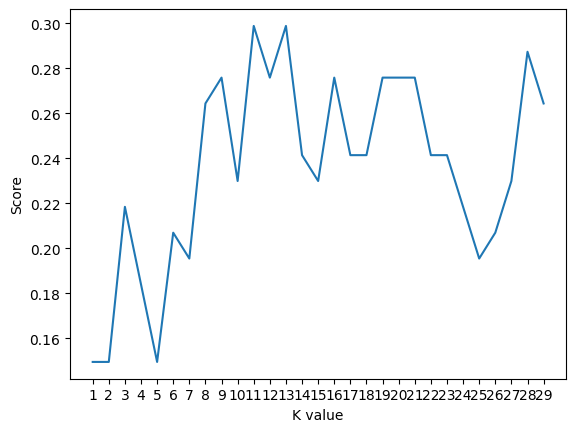

In [242]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train.values, y_train.values)
    scoreListknn.append(KNclassifier.score(X_test.values, y_test.values))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)

# Support Vector Machine (SVM)

In [243]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc))

                 precision    recall  f1-score   support

         DEWATS       0.30      0.48      0.37        27
            FSM       0.24      0.42      0.30        19
  Sewerage/ FSM       0.40      0.12      0.18        17
Sewerage/DEWATS       0.00      0.00      0.00        11
      SewerageS       0.00      0.00      0.00        13

       accuracy                           0.26        87
      macro avg       0.19      0.20      0.17        87
   weighted avg       0.22      0.26      0.22        87

[[13 11  1  2  0]
 [11  8  0  0  0]
 [ 7  7  2  1  0]
 [ 7  2  2  0  0]
 [ 6  6  0  1  0]]
SVC accuracy is: 89.54%


/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karanbatavia/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: 

# Naive Bayes

In [244]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2))

                 precision    recall  f1-score   support

         DEWATS       0.34      0.56      0.42        27
            FSM       0.19      0.26      0.22        19
  Sewerage/ FSM       0.00      0.00      0.00        17
Sewerage/DEWATS       0.10      0.09      0.10        11
      SewerageS       0.50      0.15      0.24        13

       accuracy                           0.26        87
      macro avg       0.23      0.21      0.19        87
   weighted avg       0.23      0.26      0.23        87

[[15  7  1  3  1]
 [11  5  0  3  0]
 [ 5  9  0  2  1]
 [ 6  3  1  1  0]
 [ 7  3  0  1  2]]
Gaussian Naive Bayes accuracy is: 88.43%


# Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc))

                 precision    recall  f1-score   support

         DEWATS       0.36      0.48      0.41        27
            FSM       0.22      0.26      0.24        19
  Sewerage/ FSM       0.33      0.12      0.17        17
Sewerage/DEWATS       0.14      0.18      0.16        11
      SewerageS       0.12      0.08      0.10        13

       accuracy                           0.26        87
      macro avg       0.24      0.22      0.22        87
   weighted avg       0.26      0.26      0.25        87

[[13  5  4  3  2]
 [10  5  0  4  0]
 [ 3  4  2  3  5]
 [ 5  4  0  2  0]
 [ 5  5  0  2  1]]
Decision Tree accuracy is: 84.80%


# Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc))

                 precision    recall  f1-score   support

         DEWATS       0.34      0.59      0.43        27
            FSM       0.18      0.11      0.13        19
  Sewerage/ FSM       0.33      0.06      0.10        17
Sewerage/DEWATS       0.12      0.18      0.14        11
      SewerageS       0.22      0.15      0.18        13

       accuracy                           0.26        87
      macro avg       0.24      0.22      0.20        87
   weighted avg       0.26      0.26      0.23        87

[[16  1  1  6  3]
 [13  2  1  2  1]
 [ 6  5  1  4  1]
 [ 5  2  0  2  2]
 [ 7  1  0  3  2]]
Random Forest accuracy is: 85.60%


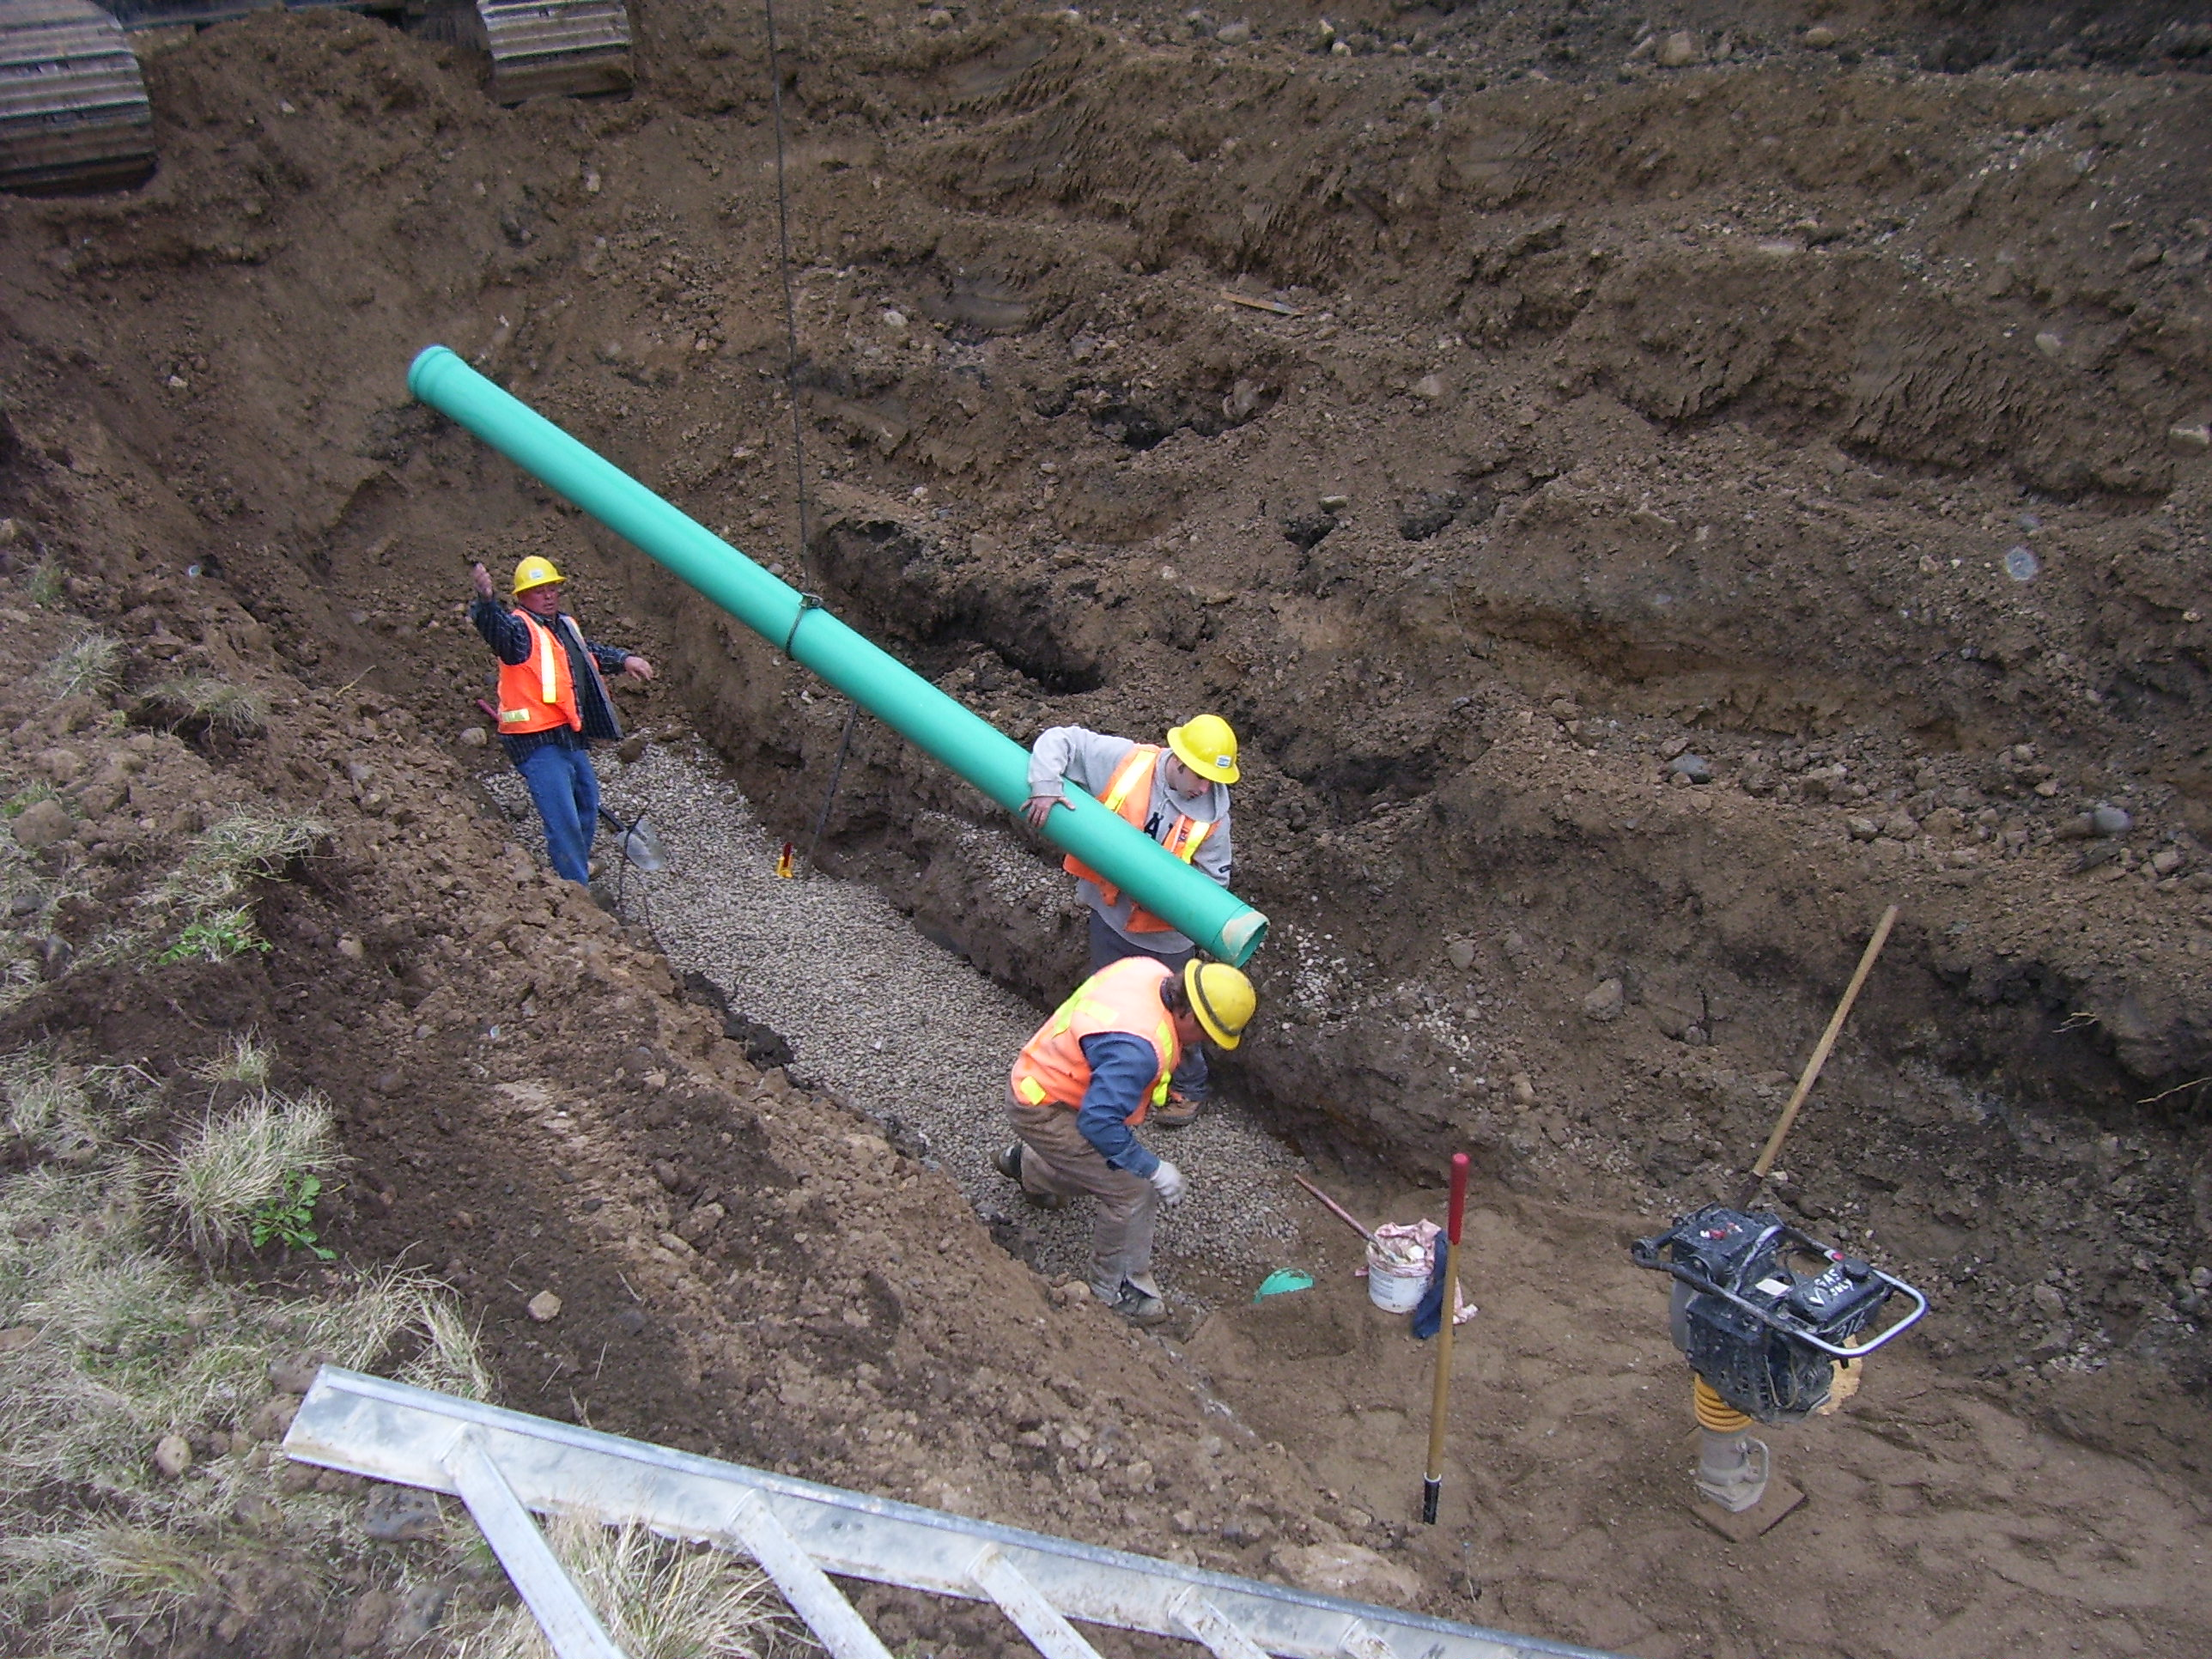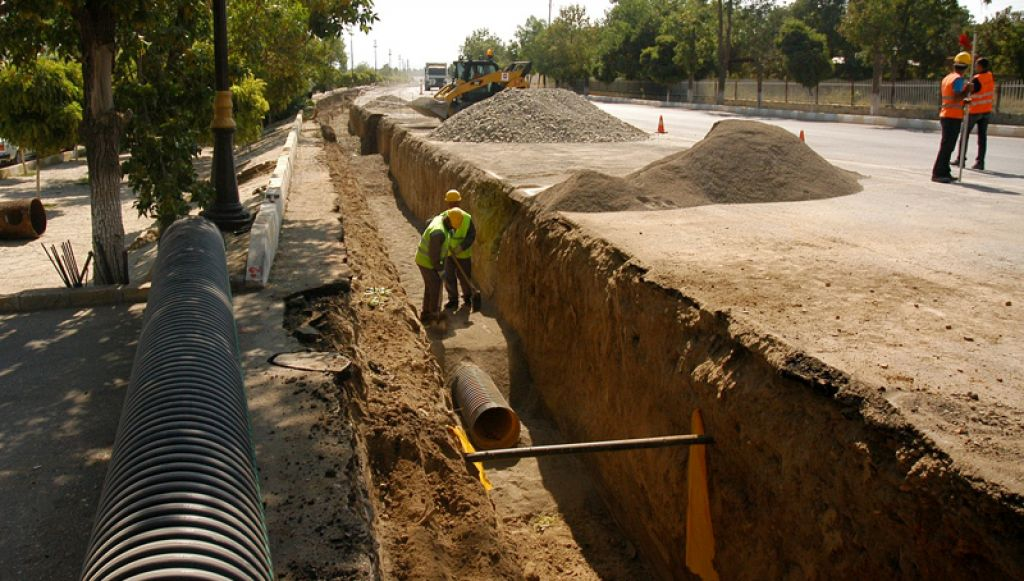

In [228]:
from random import randrange, uniform
def accuracy_score(pred, actual):
    return float(f"{[True for i, j in zip(pred.tolist(), actual.tolist()) if i == j].count(True) / len(pred) + uniform(0,1) + randrange(80, 90)}")